In [ ]:
#マウント
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
##作業するディレクトリを指定する.
%cd '/content/drive/MyDrive/Colab_Notebooks/paper'

/content/drive/MyDrive/Colab_Notebooks/paper


In [ ]:
#test
test = False

In [ ]:
#関係するツールの導入
from bs4 import BeautifulSoup
import urllib
import urllib.request as req
import time
import requests
import os
import numpy as np
import pandas as pd
import collections
import re
import math
import matplotlib.pyplot as plt
import numpy

In [ ]:
#input_folder_path: 入力となるファイルの保存場所
input_folder_path = '/content/drive/MyDrive/Colab_Notebooks/paper/paper_step3_test2'
#output_folder_path: 出力となるpdfファイルの保存場所
output_folder_path = '/content/drive/MyDrive/Colab_Notebooks/paper/paper_step4_test2'

In [ ]:
#read_file_names_list (str)-> str_lst
#("入力の場所(フォルダまでのパス)")->"入力の場所"にあるファイル名を入れたstring型のlistを返す
#
#"入力の場所"はあるフォルダへのパス.
#フォルダの中にあるファイルの名前を読み込む.
#ファイルの名前をリストに入れていく.
#ファイルの名前を入れたリストを出力として返す.
#
#例
#"/file"->["folder_1.txt","folder_2.txt","folder_3.txt"]
#
# read_file_names_list(input_path)
#
#param string input_path 読み込みファイルが存在するフォルダパス
#
#return string[] 分割されたファイル名のリスト
#

def read_file_names_list(input_path):
  files_list = []
  for filename in os.listdir(input_path):
    if os.path.isfile(os.path.join(input_path, filename)): #ファイルのみ取得
      files_list.append(filename)
  return(files_list)

In [ ]:
file_names_list = read_file_names_list(input_folder_path)
file_names_list.sort(reverse=True)

In [ ]:
#file_names_list

In [ ]:
#count_words_from_txt_file (str,str)-> str_lst
#("入力の場所(フォルダまでのパス)",ファイルの名前)->ファイルに保存されているtxtに含まれている単語をkey, その単語の出現回数をvalueとしたdic型を返す.
#
#"入力の場所"はあるフォルダへのパス.
#"入力の場所"+ファイルの名前で指定したファイルを読み込む.
#区切り文字の"\n"を","へ変更する.
#.split で単語を取り出す.
#単語とその単語の出現回数を取り出す.
#key は単語, value はその単語の出現回数とした
#dict型で出力する.
#
#例
#("/file", "foler_1.txt")->{"a": 1,"int": 3}
#
#count_words_from_txt_file(input_path,input_file_name)
#
#param string input_path 読み込みファイルが存在するフォルダパス
#param string input_file_name 読み込みするファイルの名前
#
#return dict{key = string: value = int} ファイルに保存されているtxtに含まれている単語をkey, その単語の出現回数をvalueとしたdic型
#

def count_words_from_txt_file (input_path,input_file_name):
  file_path = input_path + "/" + input_file_name
  f = open(file_path,"r")
  dic = {}
  for line in f:
    # 区切り文字の変更: スペース => カンマ
    line_1 = line.rstrip("\n")
    key, val = line_1.split(", ") 
    dic[key] = int(val)
  f.close()
  return(dic)

In [ ]:
#word_number_dictionarys_list: dict_list
#
#各ファイルごとの単語とその単語数を入れたdict型のリスト
#key: string 単語
#value: int key(単語)の出現回数
#
word_number_dictionarys_list =list(map( lambda x : count_words_from_txt_file (input_folder_path,x), file_names_list))

In [ ]:
#word_number_dictionarys_list[0]

In [ ]:
#各ファイルに含まれている単語の数
sum_word_numbers = list(map( lambda x : sum (x.values()), word_number_dictionarys_list))

In [ ]:
#word_number_dictionarys_list[0]
#sum_word_numbers

input_dictにact_dictを使って関数funを施して1つのdictを返す.

In [ ]:
#dict_fun(fun, input_dict, act_dict,param_none )) -> dict
#
#
#例
#( f, dict_input={ key1: value1, key2: value2,...},act_dict) ={ key_1: value_1, key_2: value_2,...}) -> { key1:fun(value1,value_1'), key2:fun(value2,value_2'), ... }
#value_i' :　act_dict)でのkeyiのvalue.
#
#input_dictにあってact_dictにないkeyはないものとして扱っている.
#もしその場合はact_dictのvalueが param_none で呼び出されて関数に入力される.
#
#param fun : 施したい関数 fun:(dict,dict) -> dict <-apply_functionに改名
#param dict input_dict : valueにfunを施して返したいdict <-arg_map_apply_func
#param dict act_dict) : 関数funに使いたいdict
#param param_none : act_dictのvalueがない場合 param_none で呼び出されて関数に入力される.
#
##return dict valueにfunを施した後のinput_dict
#

def dict_fun(fun, input_dict, act_dict,param_none ):
  output_dict = {k: fun(input_dict.get(k,param_none),act_dict.get(k,param_none) ) for k in input_dict.keys()}
  return output_dict

In [ ]:
#dict_fun(fun, input_dict, act_dict,param_none )) -> dict
#
#
#例
#( f, dict_input={ key1: value1, key2: value2,...},act_dict) ={ key_1: value_1, key_2: value_2,...},n) -> { key1:fun(value1,value_1',n), key2:fun(value2,value_2',n), ... }
#value_i' :　act_dict)でのkeyiのvalue.
#
#input_dictにあってact_dictにないkeyはないものとして扱っている.
#もしその場合はact_dictのvalueが param_none で呼び出されて関数に入力される.
#
#param fun : 施したい関数 fun:(dict,dict) -> dict
#param dict input_dict : valueにfunを施して返したいdict
#param dict act_dict) : 関数funに使いたいdict
#param param_fun : funで使いたいパラメータ
#param param_none : act_dictのvalueがない場合 param_none で呼び出されて関数に入力される.
#
##return dict valueにfunを施した後のinput_dict
#

def dict_fun_param_1(fun, input_dict, act_dict,param_fun, param_none ):
  output_dict = {k: fun(input_dict.get(k,param_none),act_dict.get(k,param_none),param_fun ) for k in input_dict.keys()}
  return output_dict

In [ ]:
#test
if test:
  input_dict_test = {"a":1, "b":3, "c":0, "d":0 }
  act_dict_test = {"a":1, "b":4, "c":1 }
  def func_test (a,b):
    c = a + b
    return (c) 
  dict_fun( func_test, input_dict_test, act_dict_test ,0 )
#dict_fun( func_test, input_dict_test, act_dict_test ,None )
#Noneはエラーが出て正解.

dictを並び替えて上位n個をdictとして返す.

In [ ]:
#select_top_n_from_sorted_dict (int,input_dict)-> (key, value)_lst
#(取りだすitemesの数,dict型のもの)->入力のdictを昇順に並び替えて上位のn個を(key,value)のlistに保存する.
#
#入力したdict型(input_dict)を降順にsortする
#並び替えたdictから上位n個のkeyとvalueを取り出す.
#(key, value)としてlistに入れていく.
#(key, value)のリストを出力する.
#
#例
#(2, {"a": 1, "int": 3,"word":2 }) -> [("int", 3), ("word", 2)]
#
#param int n  とりだすitemの数
#param dict input_dict 並び替える辞書
#
##return (key,value)[] dicをvalueでsortした上位n個のkeyとvalueを(key, value)の組として入れていったlist

def select_top_n_from_sorted_dict (n,dct):
  dct_lst = sorted(dct.items(), key=lambda x:x[1], reverse=True)
  dct_lst_top = dct_lst[0:(n)]
  print(dct_lst_top)

すべてのtxtファイルに出現する単語の出現頻度を出す.

In [ ]:
#merge_dict_values: (dict,dict) -> dict
#dictとdictを足す.keyに対するvalueはd1とd2を足したもの.
#d1は上書きされる.
#
#param dict d1 : 足すdictionary
#param dict d2 : 足すdictionary
#
#return dict: d1のvalueとd2のvalueを足した

from collections import Counter

def merge_dict_values(d1,d2):
  return dict(Counter(d1) + Counter(d2))

In [ ]:
#すべてのファイルに出てくる単語の出現回数.
word_number_all_files_dictionary = {}
for i in range(len(word_number_dictionarys_list)):
  word_number_all_files_dictionary = merge_dict_values(word_number_all_files_dictionary,word_number_dictionarys_list[i])

In [ ]:
#test1
if test:
  print(word_number_all_files_dictionary.get("the"))
  print(word_number_dictionarys_list[0].get("the"))
  print(word_number_dictionarys_list[1].get("the"))
  print(word_number_dictionarys_list[2].get("the"))
  print(word_number_dictionarys_list[3].get("the"))
  322+179+215+364

In [ ]:
#test
if test:
  print(word_number_all_files_dictionary["th"])
  print(word_number_dictionarys_list[0].get("th"))
  print(word_number_dictionarys_list[1].get("th"))
  print(word_number_dictionarys_list[2].get("th"))
  print(word_number_dictionarys_list[3].get("th"))

In [ ]:
#dict_frec(input_dict) -> dict
#
#input_dictのvalueの合計が1となるようにする.
#input_dictのvalueの値をすべて足す.
#各valueの値をその合計値で割る.
#計算を施した後のdictionaryを返す.
#
#例
#( {"a": 1, "int": 2,"word":2 }) -> {"a": 0.2, "int": 0.4,"word":0.4 }
#
#param dict input_dict 並び替える辞書
#
##return dict 入力のdictionaryのvalueの和が1となるようにしたdictionary
#
def dict_frec (input_dict):
  sum_value = sum(input_dict.values())
  r_dict = { k : v/sum_value for k ,v in input_dict.items()}
  return(r_dict)

In [ ]:
#すべてのファイルに出てくる単語の出現頻度.
word_freq_all_files_dictionary = dict_frec (word_number_all_files_dictionary)

In [ ]:
#test
if test:
  print(word_number_all_files_dictionary["the"]/sum(word_number_all_files_dictionary.values()))
  print(word_freq_all_files_dictionary["the"])

単語の数

In [ ]:
list(map( lambda x : select_top_n_from_sorted_dict  (5,x),word_number_dictionarys_list))

各ファイルを見たときの各単語の出現割合

In [ ]:
#各ファイルごとに単語の頻度を出してlistにまとめたもの
word_freq_dictionarys_list =list(map( lambda x : dict_frec(x),word_number_dictionarys_list))

In [ ]:
#word_freq_dictionarys_listのvalueの和を出したときに約1となるかどうかの確認
#sum(word_freq_dictionarys_list[3].values())

In [ ]:
#list(map( lambda x : select_top_n_from_sorted_dict (5,x),word_freq_dictionarys_list))

全体との割合の差

In [ ]:
def pull_func(a,b):
  c = a-b
  return(c)

In [ ]:
word_freq_pull_dictionarys_list = list(map( lambda x : dict_fun(pull_func, x, word_freq_all_files_dictionary,None),word_freq_dictionarys_list))

In [ ]:
#test
#print(word_freq_dictionarys_list[0]["the"]-word_freq_all_files_dictionary["the"])
#print(word_freq_pull_dictionarys_list[0]["the"])

In [ ]:
list(map( lambda x : select_top_n_from_sorted_dict (5,x),word_freq_pull_dictionarys_list))

全体との割合の比

In [ ]:
def divide_func(a,b):
  c = a/b
  return c

In [ ]:
word_freq_divide_dictionarys_list = list(map( lambda x : dict_fun(divide_func, x, word_freq_all_files_dictionary,None),word_freq_dictionarys_list))

In [ ]:
list(map( lambda x : select_top_n_from_sorted_dict (5,x),word_freq_divide_dictionarys_list))

In [ ]:
#test
#print(word_freq_dictionarys_list[0]["the"]/word_freq_all_files_dictionary["the"])
#print(word_freq_divide_dictionarys_list[0]["the"])

正規分布に近似して比較する.

In [ ]:
#appr_normal_distribution (input, act, n )-> float
#
#
#
#return float

def fun_appr_normal_distribution (input_value, act_value, n ):
  a = (input_value - act_value * n )/( numpy.sqrt( n * act_value * ( 1- act_value )) )
  return( a )

In [ ]:
#test
if test:
  fun_appr_normal_distribution ( 5, 0.5, 100)

In [ ]:
word_freq_appr_normal_distribution = []
for i in range(len(file_names_list)):
  word_freq_appr_normal_distribution.append( dict_fun_param_1(fun_appr_normal_distribution, word_number_dictionarys_list[i], word_freq_all_files_dictionary, sum_word_numbers[i], None) ) 

In [ ]:
#test
if test:
  print( word_freq_appr_normal_distribution[0]["the"] )
  print( word_number_dictionarys_list[0]["the"])
  print( sum_word_numbers[0])
  print( word_freq_all_files_dictionary["the"] )
  print( ( word_number_dictionarys_list[0]["the"] - sum_word_numbers[0] * word_freq_all_files_dictionary["the"] )/ numpy.sqrt( sum_word_numbers[0] * word_freq_all_files_dictionary["the"] * ( 1- word_freq_all_files_dictionary["the"])) )

In [ ]:
#test
if test:
  print( word_freq_appr_normal_distribution[1]["the"] )
  print( word_number_dictionarys_list[1]["the"])
  print( sum_word_numbers[1])
  print( word_freq_all_files_dictionary["the"] )
  print( ( word_number_dictionarys_list[1]["the"] - sum_word_numbers[1] * word_freq_all_files_dictionary["the"] )/ numpy.sqrt( sum_word_numbers[1] * word_freq_all_files_dictionary["the"] * ( 1- word_freq_all_files_dictionary["the"])) )

##図を描いてみる

In [ ]:
#make_graph (n,m,data_x,data_y,data_sub)-> graf
#
#dictionaryの値をx, data_yの値をyとしたグラフをつくる.
#
#出力はx=0.03, y=0.03までのグラフになる.
#
#param float n
#param float m
#param dict data_x 
#param dict data_y 
#param dict data_sub
#param float x_lim　グラフのx軸の最大値
#param float y_lim　グラフのy軸の最大値
#param ( int(float), int(float) ) fig_size グラフのサイズ
#
#return 図(グラフ)
def make_graph (n,m,data_x,data_y,data_sub,x_lim,y_lim,fig_size):
  dict_1 = {k: v for k, v in data_x.items() if v >= n}
  dict_2 = {k: v for k, v in data_sub.items() if v >= m}
  word_box = dict_1.keys() & dict_2.keys()
  plt.figure(figsize=fig_size)
  plt.xlim(0.0,x_lim)
  plt.ylim(0.0,y_lim)
  for key in word_box:
    x = data_x.get(key,0)
    y = data_y.get(key,0)
    plt.annotate(key,(x,y))
  plt.show()

In [ ]:
file_names_list[0:20]

['C_5_Erman_Cineli.txt',
 'C_4_Erman_Cineli.txt',
 'C_3_Erman_Cineli.txt',
 'C_2_Erman_Cineli.txt',
 'C_1_Erman_Cineli.txt',
 'B_5_Joan_Gimeno.txt',
 'B_4_Joan_Gimeno.txt',
 'B_3_Joan_Gimeno.txt',
 'B_2_Joan_Gimeno.txt',
 'B_1_Joan_Gimeno.txt',
 'A_5_Tobias_Barthel.txt',
 'A_4_Tobias_Barthel.txt',
 'A_3_Tobias_Barthel.txt',
 'A_2_Tobias_Barthel.txt',
 'A_1_Tobias_Barthel.txt',
 '2110.15949.txt',
 '2110.15943.txt',
 '2110.15926.txt',
 '2110.15914.txt',
 '2110.15907.txt']

'2110.00042.txt'

##ファイル0

In [ ]:
#test_data_2_1_sorted = sorted(test_data_2_1.items(), key=lambda x:x[1], reverse=True)
#test_data_4_1_sorted = sorted(test_data_4_1.items(), key=lambda x:x[1], reverse=True)
#word_box = ["the","and","of","algorithmic","randomness","computable","anlaysis","l1","computability"," layerwise","solovay"]
#word_box_1 = list(map(lambda x: x[0], test_data_4_0_sorted[0:99])) 
#x = list(map(lambda key: top_dictionary.get(key,0), word_box)) 
#y = list(map(lambda key: test_data_4[1].get(key,0), word_box))
test_data_x = {k: v for k, v in word_freq_dictionarys_list[5].items() if v >= 0.003}
test_data_y = {k: v for k, v in word_freq_appr_normal_distribution[5].items() if v >= 1.96}
word_box = test_data_x.keys() & test_data_y.keys()

In [ ]:
select_top_n_from_sorted_dict (3,word_freq_appr_normal_distribution[5])

[('φpθ', 58.96886435662821), ('lip', 58.04212715833307), ('delay', 54.93461012252239)]


1つのファイルの単語の頻度をx,全体のファイルの頻度をyとする.

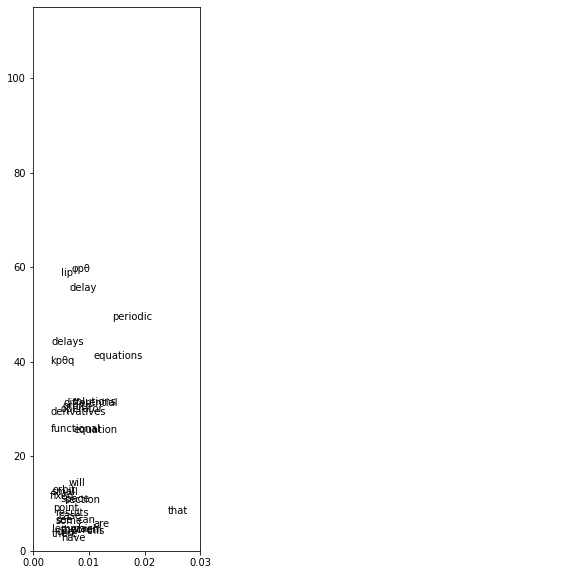

In [ ]:
plt.figure(figsize = (3,10))
plt.xlim(0.0,0.03)
plt.ylim(0.0,115)
for key in word_box:
  x = word_freq_dictionarys_list[5].get(key,0)
  #y = word_freq_dictionarys_list[0].get(key,0)
  y = word_freq_appr_normal_distribution[5].get(key,0)
  plt.annotate(key,(x,y))
plt.show()

In [ ]:
len(word_freq_all_files_dictionary.keys())

33640

##クラスタリング
#距離の取り方
ユークリッド
z値だけでクラスタリングするのか,
z値＋そのファイルでの頻度

In [ ]:
file_names_list[1]

'C_4_Erman_Cineli.txt'

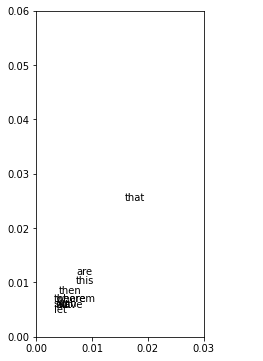

In [ ]:
make_graph (0.003,1.96,word_freq_all_files_dictionary,word_freq_dictionarys_list[1],word_freq_appr_normal_distribution[1], 0.03, 0.06, (3,6))

In [ ]:
if test:
  print( word_freq_appr_normal_distribution[1]["of"] )
  print( word_freq_all_files_dictionary["of"])
  print(word_freq_dictionarys_list[1]["of"])

In [ ]:
#make_word_box_from_dict_top_n (dct,n)-> string_list
#
#入力の辞書をvalueの降順にソートして上位n単語を入れたリストを返す.
#
#param dict dct ソートする辞書 
#param int n 選ぶ単語数
#
#return string_list valueの値上位n単語を入れたリスト
def make_word_box_from_dict_top_n (dct,n) :
  sorted_dictionary = sorted(dct.items(), key=lambda x:x[1], reverse=True)
  word_box = []
  for i in range(n):
    (key,value) = sorted_dictionary[i]
    word_box.append(key)
  word_box = np.array(word_box)
  return (word_box)

In [ ]:
word_box =np.array(list(map(lambda x:make_word_box_from_dict_top_n (x,20),word_freq_appr_normal_distribution)))

In [ ]:
if True:
  print(np.setxor1d(word_box[0], word_box[1]))
  print(word_box[0])
  print(word_box[1])

['action' 'aspherical' 'capping' 'condition' 'conley' 'defect'
 'degenerate' 'dold' 'equivariant' 'extremal' 'floer' 'hamiltonian'
 'homology' 'isolated' 'iterated' 'lefschetz' 'loop' 'orientations'
 'partition' 'partitions' 'product' 'pseudo' 'quantum' 'rotation'
 'rotations' 'shzh' 'sign' 'str' 'supertrace' 'symplectomorphism'
 'symplectomorphisms' 'toric' 'urel' 'witten' 'µcz' 'µrs' 'φki' 'φℓi'
 'ϕki' 'ﬁltered']
['homology' 'floer' 'iterated' 'supertrace' 'µcz' 'sign' 'lefschetz'
 'orientations' 'hamiltonian' 'equivariant' 'action' 'isolated'
 'symplectomorphism' 'str' 'aspherical' 'dold' 'symplectomorphisms'
 'ﬁltered' 'shzh' 'capping']
['extremal' 'pseudo' 'rotations' 'φki' 'toric' 'φℓi' 'quantum'
 'degenerate' 'rotation' 'loop' 'partition' 'conley' 'partitions' 'ϕki'
 'µrs' 'witten' 'product' 'urel' 'defect' 'condition']


In [ ]:
word_box[0]

array(['homology', 'floer', 'iterated', 'supertrace', 'µcz', 'sign',
       'lefschetz', 'orientations', 'hamiltonian', 'equivariant',
       'action', 'isolated', 'symplectomorphism', 'str', 'aspherical',
       'dold', 'symplectomorphisms', 'ﬁltered', 'shzh', 'capping'],
      dtype='<U76')

In [ ]:
#add_str_lst_set  (list1,list2) -> list
#
#二つの辞書をつなげる
#重複はなし
#list1は上書きされる
#
#param list list1 つなげるリスト
#param list list2 つなげるリスト
#
#return string_list valueの値上位n単語を入れたリスト
if False:
  def add_str_lst_set  (list1,list2):
    #list1とlist2をつなげる
    list1.extend(list2)
    #重複の除外
    list1=list(set(list1))
    return list1

In [ ]:
#make_dictionary_data (dct,key_list) -> dict
#
#key_listにあるkeyを参照してdctにそのkeyのvalueを入れたリストをとってくる
#
#param dict dct
#param string_list key_list 単語のリスト
#
#return float_list 

def make_dictionary_data (dct,key_list) : 
  dct_1 = [dct.get(k,0) for k in key_list]
  return dct_1

##クラスタリングするために使う単語各ファイルはnとする.クラスタリングするファイルの数はmとする.


正規分布近似しているがない単語に対応する数値を0と指定し待っていることが気になる.

In [ ]:
#make_data_set (dct_list_1,dct_list_2,n,m,output_folder_path,file_names_list)
#
#
#word_boxを作る. 
#   dct_list_1の各辞書のvalueの上位n個のkeyを入れたリスト
#top_n_dictionaryを作る.
#   word_boxを一つにまとめたもの
#   top_n_dictionaryに重複はなし.
#data_setを作る.
#   top_n_dictionaryを参照してdct_list_2のvalueを取り出す.
#   ただしdct_list_2のうちdct_list_2[0:m]のみで上記の操作をする.
#   dct_list_2にない単語は0とする.
#dfを作る.
#   data_setをDataFrameにする.
#作成したデータセットをcsvファイルで保存.名前:"rate_data_"+ str(m) + ".csv"
#各ファイル名を入れたリストをtxtファイルで保存.名前:'file_names_list_'+ str(n)+'.txt'
#データセットを作った参照元の単語の集合をtxtファイルで保存.名前: 'top_n_dictionary_'+ str(n)+'.txt'
#
#
#param dict_list dct_list_1 :(各上位n個の単語を取り出す)
#param dict_list dct_list_2 :(word_boxを参照して各値を取り出す)
#param n : 単語を取り出す個数を指定する
#param n : data setにする辞書の個数を指定する
#param str output_folder_path : 各ファイルを保存するフォルダへのパスを指定.
#param str_list file_names_list: 各ファイル名のリスト
#
#return 図(グラフ)
def make_data_set (dct_list_1,dct_list_2,n,m,output_folder_path,file_names_list):
  word_box = list(map(lambda x:make_word_box_from_dict_top_n (x,n),dct_list_1))
  top_n_dictionary = []
  for item in word_box:
    add_str_lst_set(top_n_dictionary, item)
  data_set = list(map(lambda x:make_dictionary_data(x, top_n_dictionary ),dct_list_2[0:m]))
  df=pd.DataFrame(data_set )
  df.to_csv(output_folder_path + '/' +"rate_data_"+ str(n) + ".csv", sep=",")
  path_a = output_folder_path + "/" + 'file_names_list_'+ str(n)+'.txt'
  f= open( path_a ,"w")
  #lst = take_out_word(path_a,file_name)
  for x in file_names_list[0:20]:
      f.write(str(x) + "\n")
    #f.write(f'{key} \,{value}\n')
  f.close()
  path_b = output_folder_path + "/" + 'top_n_dictionary_'+ str(n)+'.txt'
  f= open( path_b ,"w")
  #lst = take_out_word(path_a,file_name)
  for x in top_n_dictionary:
    f.write(str(x) + "\n")
    #f.write(f'{key} \,{value}\n')
  f.close()

In [ ]:
if True :#test:
  a = ["a", "abc"]
  b = ["b", "abc"]
  c = add_str_lst_set(a,b)
  print('a',a)
  print('b',b)
  print(c)

a ['a', 'abc', 'b', 'abc']
b ['b', 'abc']
['a', 'abc', 'b']


#各ファイルの値上位20単語を用いる.

In [ ]:
make_data_set (word_freq_appr_normal_distribution,word_freq_appr_normal_distribution,20,20,output_folder_path,file_names_list)

In [ ]:
if test:
  word_box = list(map(lambda x:make_word_box_from_dict_top_n (x,n),word_freq_appr_normal_distribution))
  top_n_dictionary = []
  for item in word_box:
    add_str_lst_set(top_n_dictionary, item)
  data_set = list(map(lambda x:make_dictionary_data(x, top_n_dictionary ),word_freq_appr_normal_distribution[0:20]))
  df=pd.DataFrame(data_set )
  df.to_csv(output_folder_path + '/' +"rate_data_20.csv", sep=",")
  path_a = output_folder_path + "/" + 'file_names_list_20.txt'
  f= open( path_a ,"w")
  #lst = take_out_word(path_a,file_name)
  for x in file_names_list[0:20]:
    f.write(str(x) + "\n")
    #f.write(f'{key} \,{value}\n')
  f.close()
  path_b = output_folder_path + "/" + 'top_n_dictionary_20.txt'
  f= open( path_b ,"w")
  #lst = take_out_word(path_a,file_name)
  for x in top_n_dictionary:
    f.write(str(x) + "\n")
    #f.write(f'{key} \,{value}\n')
  f.close()

#各ファイルの値上位30単語を用いる.

In [ ]:
make_data_set (word_freq_appr_normal_distribution,word_freq_appr_normal_distribution,30,20,output_folder_path,file_names_list)